# Exploring and Visualizing data


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


#### Libraries


In [ ]:
# Create an environment with Python >=3.7 & <=3.11 for library compatibility
# conda create -n basicMachineLearning python=3.7
# conda install -n basicMachineLearning ipykernel --update-deps --force-reinstall

# Libraries required.
# pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 
# scikit-learn==0.20.1 requests beautifulsoup4 ipython-sql sqlalchemy==1.3.9

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

Reading the SpaceX dataset into a Pandas dataframe and printing a summary


In [16]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)

df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [17]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### `FlightNumber` vs `Payload`



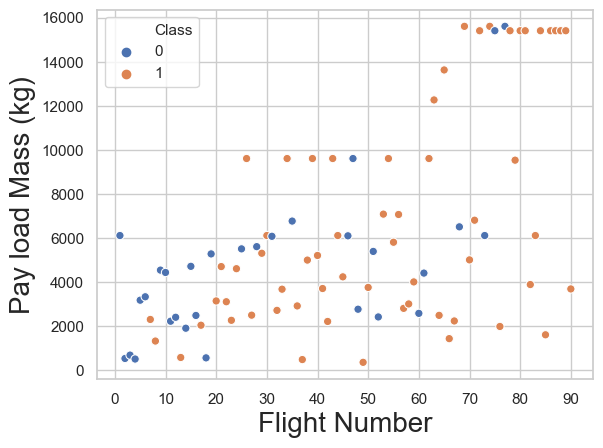

In [98]:

sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="FlightNumber", 
                     y="PayloadMass", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.legend(loc='upper left')
# Set the tick locations and labels, can also use np array here
ax.set_xticks(np.arange(0,len(df)+1,10))
ax.set_xticklabels(np.arange(0,len(df)+1,10))
plt.show(ax)


As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems like the more massive the payload, the less likely it is that the first stage will return.

### `FlightNumber` vs `LaunchSite`

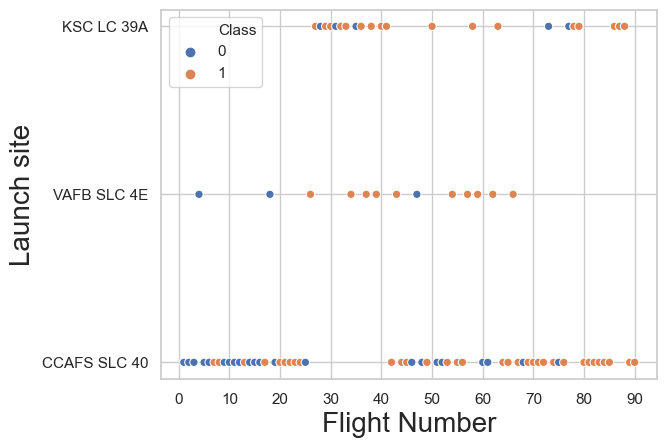

In [114]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="FlightNumber",
                     y="LaunchSite", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch site",fontsize=20)
plt.legend(loc='upper left')
# Set the tick locations and labels, can also use np array here
ax.set_xticks(np.arange(0,len(df)+1,10))
ax.set_xticklabels(np.arange(0,len(df)+1,10))
plt.show(ax)


It looks like the success rate increased with the number of flights in each site.


### `PayloadMass` vs `LaunchSite`

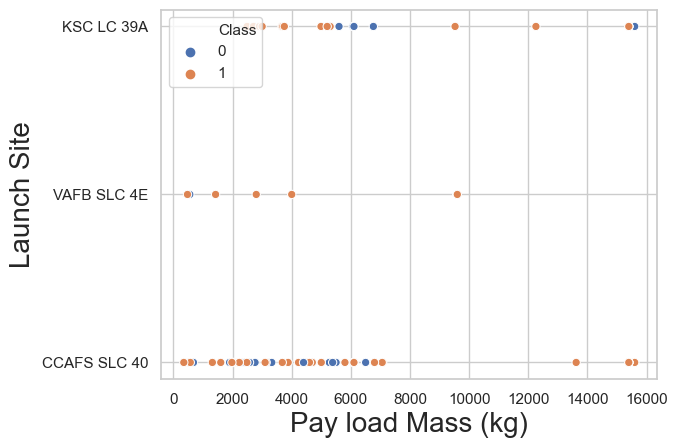

In [113]:
sns.set()
sns.set_style("whitegrid")
ax = sns.scatterplot(x="PayloadMass", 
                     y="LaunchSite", 
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

In the Payload Vs. Launch Site scatter point chart, the VAFB-SLC launchsite has no rockets launched with a mass greater than 10000 kg.


### success rate of each `Orbit`

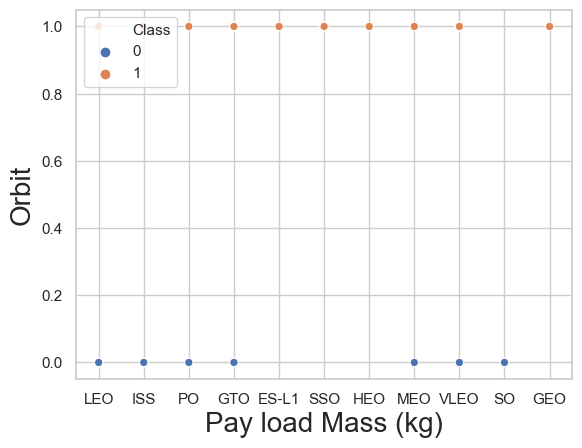

In [117]:

sns.set()
sns.set_style("whitegrid")
ax = plt.bar(y="Class", 
                     x="Orbit",
                     hue="Class", 
                     data=df, 
                     legend='full')
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.legend(loc='upper left')
plt.show(ax)

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


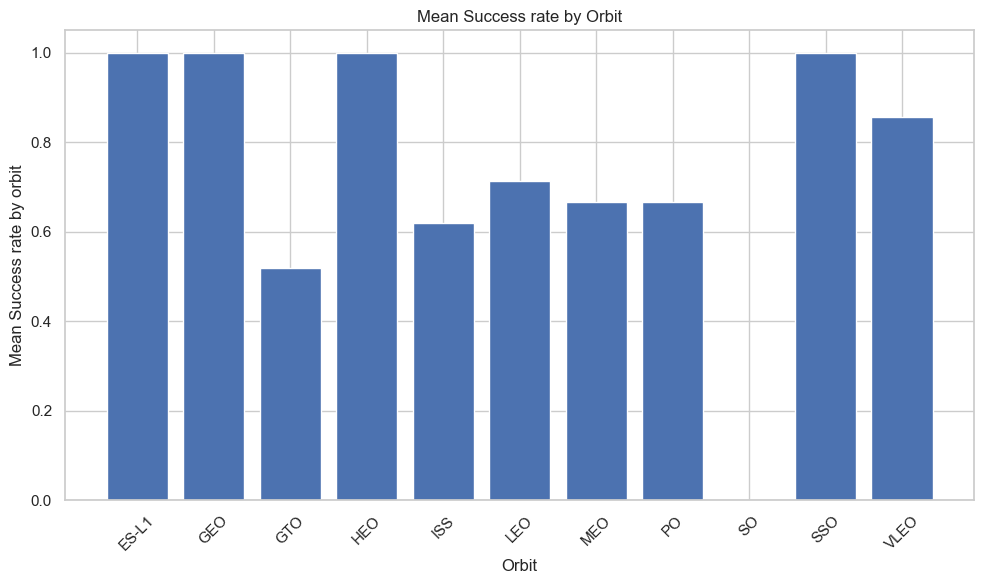

In [119]:
grouped_data = df.groupby('Orbit')['Class'].mean().reset_index()
grouped_data.head()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Orbit'], grouped_data['Class'])
plt.xlabel('Orbit')
plt.ylabel('Mean Success rate by orbit')
plt.title('Mean Success rate by Orbit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot (you can also save it using plt.savefig)
plt.show()

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [ ]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [ ]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [ ]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [ ]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
